In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [2]:
# Load the datasets
customers = pd.read_csv('./Customers.csv')
products = pd.read_csv('./Products.csv')
transactions = pd.read_csv('./Transactions.csv')


In [3]:
# Display basic info and first few rows of each dataset
print(customers.info())
print(customers.head())
print(products.info())
print(products.head())
print(transactions.info())
print(transactions.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   Produ

In [4]:
# Checking for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Handling missing values (if any)
customers.fillna('Unknown', inplace=True)
products.fillna('Unknown', inplace=True)
transactions.dropna(inplace=True)  # Drop rows with missing values


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


Exploratory Data Analysis (EDA)


Customer Demographics

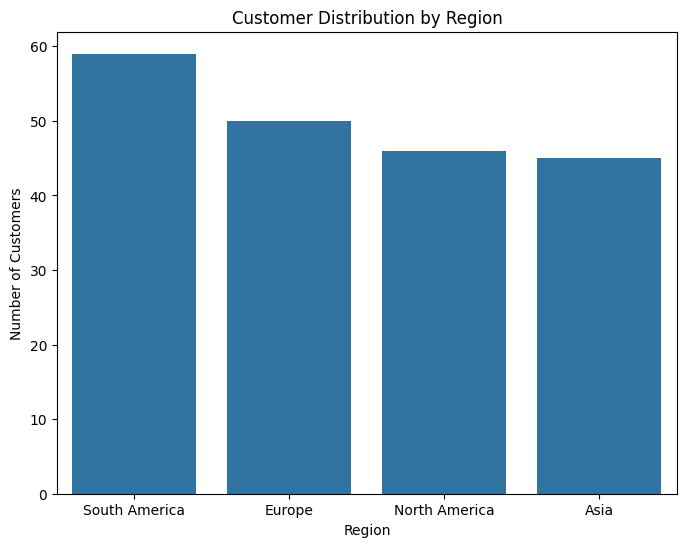

In [5]:
# Count customers by region
region_counts = customers['Region'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title("Customer Distribution by Region")
plt.ylabel("Number of Customers")
plt.show()


Signup Date Analysis

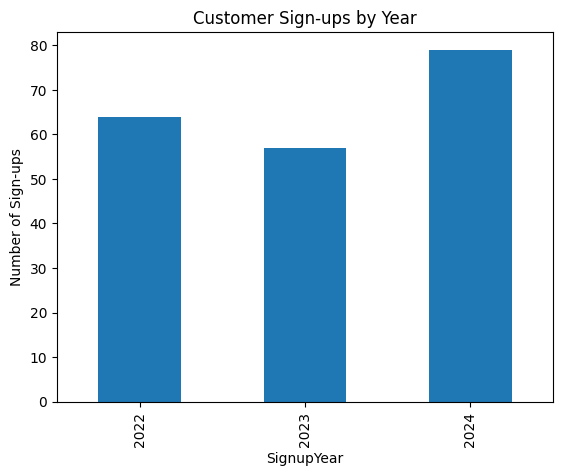

In [6]:
# Convert 'SignupDate' to datetime and plot signup trend
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupYear'] = customers['SignupDate'].dt.year
signup_year_counts = customers['SignupYear'].value_counts().sort_index()
signup_year_counts.plot(kind='bar', title="Customer Sign-ups by Year")
plt.ylabel("Number of Sign-ups")
plt.show()


Product Price Distribution

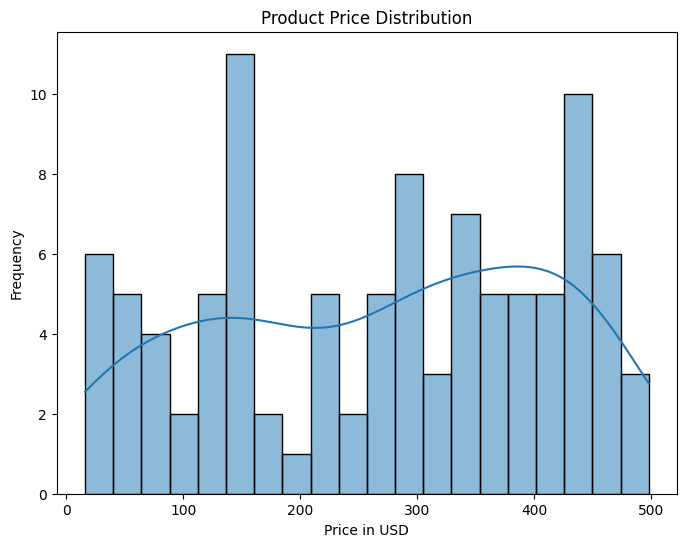

In [7]:
# Plot price distribution for products
plt.figure(figsize=(8,6))
sns.histplot(products['Price'], kde=True, bins=20)
plt.title("Product Price Distribution")
plt.xlabel("Price in USD")
plt.ylabel("Frequency")
plt.show()


Transactions Overview

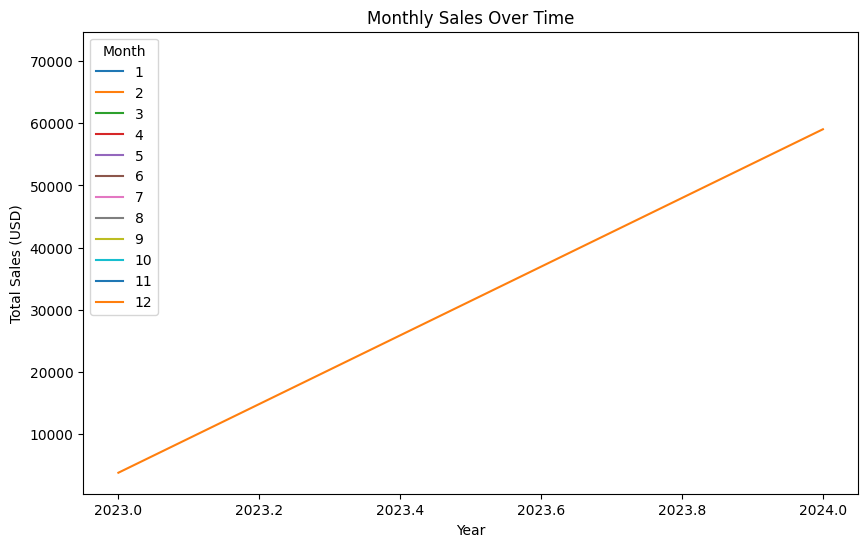

In [8]:
# Convert 'TransactionDate' to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Total sales over time
transactions['Year'] = transactions['TransactionDate'].dt.year
transactions['Month'] = transactions['TransactionDate'].dt.month
transactions['TotalValue'] = transactions['TotalValue'].astype(float)

# Plot total sales over time
monthly_sales = transactions.groupby(['Year', 'Month'])['TotalValue'].sum().unstack()
monthly_sales.plot(kind='line', figsize=(10, 6))
plt.title("Monthly Sales Over Time")
plt.ylabel("Total Sales (USD)")
plt.show()


Most Popular Products

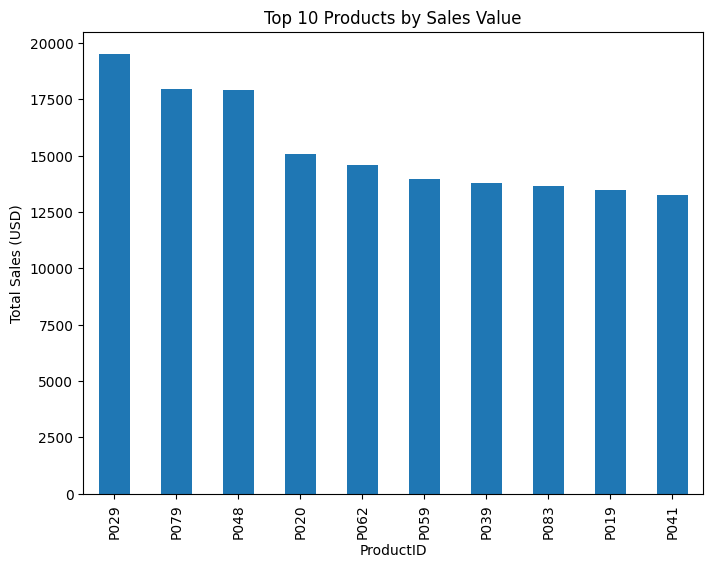

In [9]:
# Identify top 10 products based on sales
top_products = transactions.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', figsize=(8,6), title="Top 10 Products by Sales Value")
plt.ylabel("Total Sales (USD)")
plt.show()


Business Insights Generation

In [10]:
# Display overall sales statistics and product trends
total_sales = transactions['TotalValue'].sum()
num_transactions = transactions.shape[0]
num_customers = customers.shape[0]

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Number of Transactions: {num_transactions}")
print(f"Number of Customers: {num_customers}")

Total Sales: $689,995.56
Number of Transactions: 1000
Number of Customers: 200


Bi-variant analysis of region and signups per year

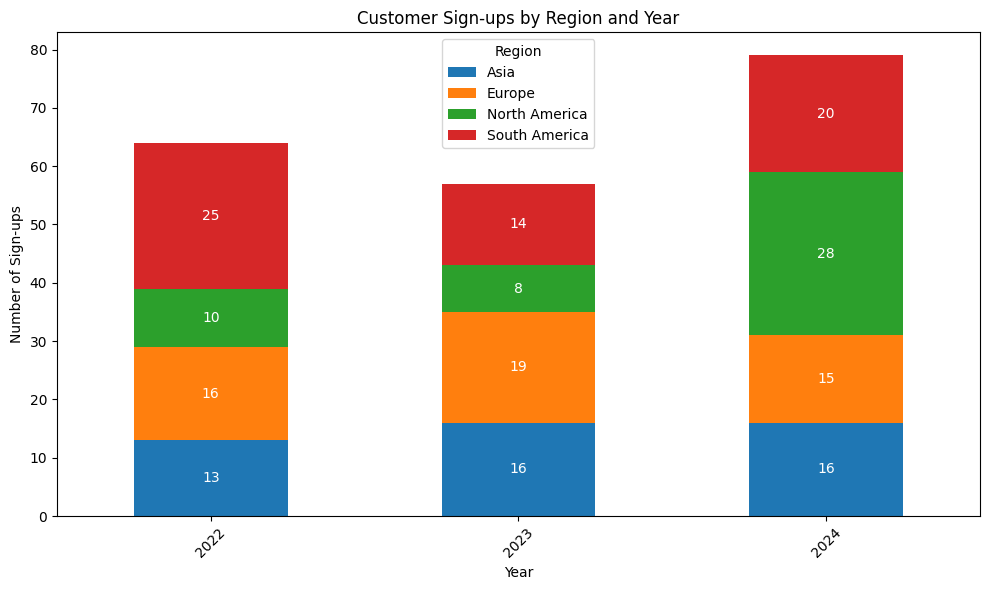

In [11]:
# Convert SignupDate to datetime and extract the year
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupYear'] = customers['SignupDate'].dt.year

# Group the data by year and region, and count sign-ups
signup_by_region = customers.groupby(['SignupYear', 'Region']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(10, 6))
signup_by_region.plot(kind='bar', stacked=True, ax=ax)

# Add count/percentage
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = p.get_y() + height / 2

    # Get the count as the label
    count_label = f'{height:.0f}'

    ax.text(x, y, count_label, ha='center', va='center', fontsize=10, color='white')

plt.title('Customer Sign-ups by Region and Year')
plt.ylabel('Number of Sign-ups')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.legend(title='Region')

plt.tight_layout()
plt.show()


Top 10 Products by Sales Value with Category

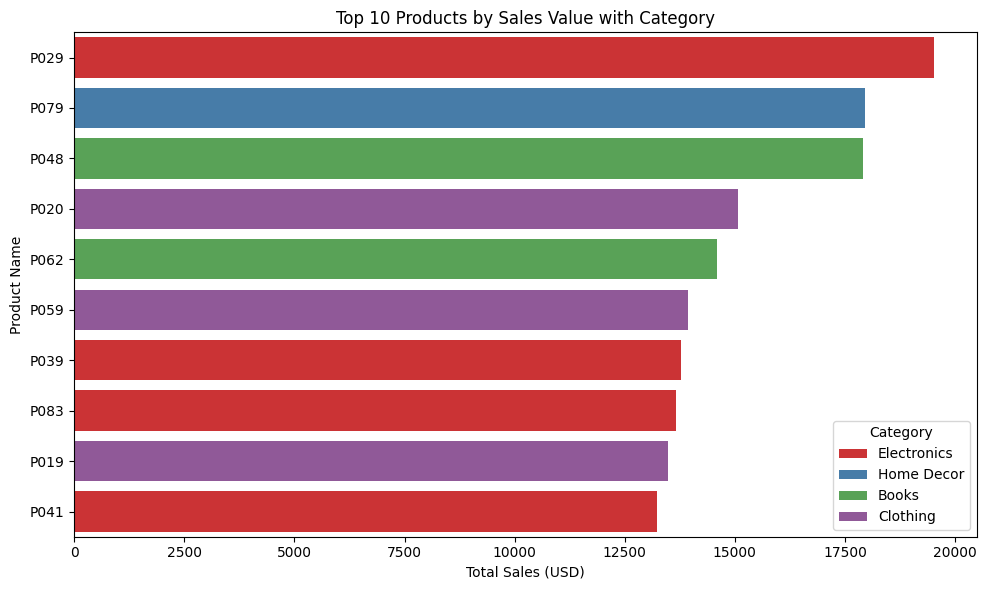

In [12]:
# Group by ProductID and sum the sales for each product
product_sales = transactions.groupby('ProductID')['TotalValue'].sum().reset_index()

# Merge with the products dataframe to get the product categories
product_sales = product_sales.merge(products[['ProductID', 'Category']], on='ProductID', how='left')

# Sort the products by sales to identify top products
top_products = product_sales.sort_values(by='TotalValue', ascending=False).head(10)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalValue', y='ProductID', data=top_products, hue='Category', palette='Set1')

plt.title('Top 10 Products by Sales Value with Category')
plt.xlabel('Total Sales (USD)')
plt.ylabel('Product Name')

plt.tight_layout()
plt.show()
